In [77]:
import pickle as pkl
import numpy as np
from Modules.model_COMP_5430 import *
from Modules.rnn_utils.utilities import MinMax
import matplotlib.pyplot as plt
import pandas as pd

## De-pickle Preprocessed Data

In [78]:
with open('ppData_scaler_10_files.pkl', 'rb') as file:
    ppData_scaler = pkl.load(file)

preprocessed_data = ppData_scaler[0]
scaler = ppData_scaler[1]

print("ppData[0]:",preprocessed_data)
print("ppData[1]", scaler)


ppData[0]: {'../../archive\\PM.csv': [array([[[0.08946669],
        [0.09064047]],

       [[0.09064047],
        [0.09343504]],

       [[0.09343504],
        [0.08812529]],

       ...,

       [[0.84753485],
        [0.84251339]],

       [[0.84251339],
        [0.83288866]],

       [[0.83288866],
        [0.81552262]]]), array([[0.09343504],
       [0.08812529],
       [0.09846541],
       ...,
       [0.83288866],
       [0.81552262],
       [0.82839025]]), array([[[0.82315948],
        [0.82692551]],

       [[0.82692551],
        [0.8233687 ]],

       [[0.8233687 ],
        [0.81981181]],

       [[0.81981181],
        [0.80589797]],

       [[0.80589797],
        [0.81740564]],

       [[0.81740564],
        [0.80244561]],

       [[0.80244561],
        [0.79072863]],

       [[0.79072863],
        [0.79700553]],

       [[0.79700553],
        [0.80443332]],

       [[0.80443332],
        [0.79386716]],

       [[0.79386716],
        [0.79993483]],

       [[0.79993483],
    

## Initialize Model

In [79]:
model = RNN(1, 30, 1, 0.0001)


## Train Model

In [80]:
# For each file in preprocessed data
train_outputs = list()
test_outputs = list()

i = 0
for key in preprocessed_data:
    print("File:",str(key))
    # Unpack dictionary into train, test variables
    train_test_list = preprocessed_data[key]
    train_input_3d, train_target, test_input_3d, test_target = train_test_list

    train_outputs.append(model.train(train_input_3d, train_target))
    test_outputs.append(model.test(test_input_3d))
    i += 1
    if i % 20 == 0 and i != 0:
        print(f" Trained {i} files so far...")

File: ../../archive\PM.csv
File: ../../archive\CZR.csv
File: ../../archive\PKI.csv
File: ../../archive\SCHW.csv
File: ../../archive\CLX.csv
File: ../../archive\ADP.csv
File: ../../archive\NWS.csv
File: ../../archive\NTAP.csv
File: ../../archive\PARA.csv
File: ../../archive\NDAQ.csv


## Save for Output

In [82]:


# de-normalize
train_outputs = scaler.denormalize_data(train_outputs)
train_targets = scaler.denormalize_data(train_target)
test_outputs = scaler.denormalize_data(test_outputs)
test_targets = scaler.denormalize_data(test_target)

# with open('forecast_final_RNN_Scratch.pkl', 'wb') as file:
#     pkl.dump(model, file)

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Put RMSE Here
rmse = np.sqrt(np.mean((test_outputs - test_targets) ** 2))
print("RMSE:", rmse)

RMSE: 18.697708602230293


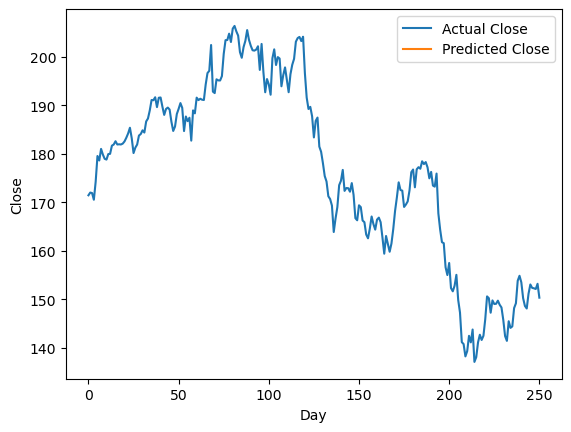

In [ ]:
plt.plot(test_targets, label='Actual Close')
plt.plot(test_outputs, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()